**CMP585 - Structural Bioinformatics**

Cristian Lopes

*Assignment 2*

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

# Load Data

In [2]:
def read_molecule(path):
    atoms = []
    with open(path, 'r') as f:
        for line in f:
            if line.startswith('ATOM'):
                atoms.append({'atom_name': line[12:16].strip(), 
                             'residue_name': line[17:20].strip(),
                             'residue_seq_number': line[22:26].strip(),
                             'x': float(line[30:38].strip()), 
                             'y': float(line[38:46].strip()),
                             'z': float(line[46:54].strip())})
    return pd.DataFrame(atoms)

In [3]:
molecule = read_molecule('./data/1crn.pdb')

In [4]:
molecule.head(20)

,atom_name,residue_name,residue_seq_number,x,y,z
0,N,THR,1,17.047,14.099,3.625
1,CA,THR,1,16.967,12.784,4.338
2,C,THR,1,15.685,12.755,5.133
3,O,THR,1,15.268,13.825,5.594
4,CB,THR,1,18.170,12.703,5.337
5,OG1,THR,1,19.334,12.829,4.463
6,CG2,THR,1,18.150,11.546,6.304
7,N,THR,2,15.115,11.555,5.265
8,CA,THR,2,13.856,11.469,6.066
9,C,THR,2,14.164,10.785,7.379


# Q1) Primary to Tertiary Structure

## Symbol of each amino acid

First of all, we define the symbol of each amino acid.

In [5]:
symbol_to_residue_name = {
    'T': 'THR', 'C': 'CYS', 'P': 'PRO', 'S': 'SER', 'I': 'ILE',
    'V': 'VAL', 'A': 'ALA', 'R': 'ARG', 'N': 'ASN', 'F': 'PHE',
    'L': 'LEU', 'G': 'GLY', 'E': 'GLU', 'D': 'ASP', 'Y': 'TYR'
}

## Load Amino Acids 

Then, we load the amino acids from the Protein Data Bank.

In [6]:
AMINOACID_PATH = './data/amino_acids/'
aminoacids = pd.DataFrame()

for f in glob.glob(AMINOACID_PATH + "*.pdb"):
    aminoacids = aminoacids.append(read_molecule(f))

In [7]:
aminoacids[aminoacids.residue_name == 'LYS']

,atom_name,residue_name,residue_seq_number,x,y,z
0,N,LYS,1,1.225,0.626,1.344
1,CA,LYS,1,2.680,0.748,1.344
2,C,LYS,1,3.101,2.198,1.344
3,O,LYS,1,2.282,3.114,1.344
4,CB,LYS,1,3.295,0.003,0.122
5,CG,LYS,1,4.851,0.029,0.085
6,CD,LYS,1,5.489,-0.610,-1.156
7,CE,LYS,1,7.019,-0.426,-1.103
8,NZ,LYS,1,7.630,-1.052,-2.310
9,1H,LYS,1,0.578,1.491,1.344


In [8]:
aminoacids.head(50)

,atom_name,residue_name,residue_seq_number,x,y,z
0,N,ALA,1,0.039,-0.028,0.000
1,CA,ALA,1,1.499,-0.043,0.000
2,C,ALA,1,2.055,1.361,0.000
3,O,ALA,1,1.321,2.356,0.011
4,CB,ALA,1,1.956,-0.866,-1.217
5,1H,ALA,1,-0.524,0.894,0.000
6,2H,ALA,1,-0.543,-0.938,0.000
7,HA,ALA,1,1.847,-0.534,0.928
8,1HB,ALA,1,3.058,-0.939,-1.274
9,2HB,ALA,1,1.571,-1.903,-1.181


Right now, we have a dictionnary of amino acids containing the position of each atom inside the amino acid.

## Primary structure to tertiary structure

### Translation and Rotation

Next step is to replace each symbol of the primary structure by its corresponding residue. First, we define a translation and a rotation function to move and rotate the next amino acid given the position of the previous aminoacid.

In [9]:
def translate(aminoacid, translation):
    aminoacid[['x', 'y', 'z']] = aminoacid[['x', 'y', 'z']] + translation
    return aminoacid

In [10]:
def translation_to_origin(aminoacid, ref_atom='N'):
    ref_translation = aminoacid[aminoacid.atom_name == ref_atom][['x', 'y', 'z']].values.reshape(-1)
    return ref_translation, translate(aminoacid, -ref_translation)
    

def rotate(aminoacid, angle_x, angle_y, angle_z):  
    Rx = [[1, 0, 0], [0, np.cos(angle_x), -np.sin(angle_x)], [0, np.sin(angle_x), np.cos(angle_x)]]
    Ry = [[np.cos(angle_y), 0, np.sin(angle_y)], [0, 1, 0], [-np.sin(angle_y), 0, np.cos(angle_y)]]
    Rz = [[np.cos(angle_z), -np.sin(angle_z), 0], [np.sin(angle_z), np.cos(angle_z), 0], [0, 0, 1]]
    R = np.dot(np.dot(Rx, Ry), Rz)
    
    ref_translation, aminoacid = translation_to_origin(aminoacid)
    aminoacid[['x', 'y', 'z']] = R.dot(aminoacid[['x', 'y', 'z']].values.T).T
    aminoacid = translate(aminoacid, ref_translation)
    
    return aminoacid

### Planar Peptide Bond Constraints

Given the position of  O and C (Carboxyl) from the previous amino acid and the position of N from the next one, we can calculate the necessary translation and rotation in the next amino acid in order to form a planar peptide bond, that means, Omega equals to 180° (considering a distance of 1.33 ångström between C and N and an angle of 123,5° between O-C and C-N as shown in the figure below).

<div style="text-align:center"><img width="600px" src="./images/planar_peptide_bond.png"/></div>
<br>
<br>
<div style="text-align:center">Figure 1:  The average dimensions of the planar peptide group (in angstroms and degrees).</div>
<div style="text-align:center">Source: https://www.open.edu/openlearn/science-maths-technology/science/biology/proteins/content-section-1.2)</div>

In [11]:
def calculate_distance(p1, p2): # distance between Ci and Ni+1 should be 1.33 ångström
    return np.sqrt(np.sum((p1-p2) ** 2))

In [12]:
def calculate_angle(p1, p2, p3): # angle between Oi-Ci and Ci-Ni+1 should be 123.5°
    p1, p2, p3 = np.array(p1), np.array(p2), np.array(p3)
    
    p1_ref = p1 - p2
    p3_ref = p3 - p2
    
    cosine_angle = np.dot(p1_ref, p3_ref) / (np.linalg.norm(p1_ref) * np.linalg.norm(p3_ref))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

In [13]:
def calculate_dihedral_angle(p1, p2, p3, p4): # dihedral angle between Calphai-Ci-Ni+1 and Ci-Ni+1-Caminoi+1 should be 180°
    p1, p2, p3, p4 = np.array(p1), np.array(p2), np.array(p3), np.array(p4)
    
    b1 = -1.0 * (p2 - p1)
    b2 = p3 - p2
    b3 = p4 - p3
    
    # normalize b2
    b2 /= np.linalg.norm(b2)
    
    # projections of b1 and b3 onto plane perpendicular to b2
    v = b1 - np.dot(b1, b2) * b2
    w = b3 - np.dot(b3, b2) * b2
    
    # angle between v and w is the torsion angle
    x = np.dot(v, w)
    y = np.dot(np.cross(b2, v), w)
    return np.degrees(np.abs(np.arctan2(y, x)))

### Calculate Next Amino Acid Translation and Rotation

Based on the constraints, we can calculate the translation and rotation of the next amino acid given the previous one. We are going to use the Genetic Algorithm to calculate the necessary translation and rotation in order to satisfy the constraints.

In [14]:
class GeneticAlgorithm:
    def __init__(self, dim_populaton, n_population, previous_aminoacid, next_aminoacid):
        self.DIM_POPULATION = dim_populaton
        self.N_POPULATION = n_population
        
        self.distances = []
        self.angles = []
        self.dihedral_angles = []
        self.average_fitness = []
        
        self.previous_aminoacid = previous_aminoacid
        self.next_aminoacid = next_aminoacid

        self.population = self.initialize_population()
        self.fitness = self.compute_population_fitness()
        self.previous_fitness = None

        self.iteration = 0

    # Initialization
    def initialize_population(self):
        initial_population = [np.random.uniform(-1, 1, self.DIM_POPULATION) for _ in range(self.N_POPULATION)]

        return initial_population

    def generate_new_population(self):
        new_population = []
        for _ in range(self.N_POPULATION // 2):
            childrens = self.intermediate_recombination()
            new_population.extend([self.gaussian_convolution(children) for children in childrens])

        return new_population

    # Fitness
    def individual_fitness(self, o_previous, c_previous, n_next, c_alpha_previous, c_amino_next):
        desired_distance = 1.33
        desired_angle = 123.5
        desired_dihedral_angle = 180.0

        distance = calculate_distance(c_previous, n_next)
        angle = calculate_angle(o_previous, c_previous, n_next)
        dihedral_angle = calculate_dihedral_angle(c_alpha_previous, c_previous, n_next, c_amino_next)

        self.distances.append(distance)
        self.angles.append(angle)
        self.dihedral_angles.append(dihedral_angle)
        
        fitness = (
            np.abs(distance - desired_distance) / desired_distance +
            np.abs(angle - desired_angle) / desired_angle +
            np.abs(dihedral_angle - desired_dihedral_angle) / desired_dihedral_angle
        )
        
        return fitness

    def compute_population_fitness(self):
        population_fitness = []
        for individual in self.population:
            p_aminoacid = self.previous_aminoacid.copy()
            n_aminoacid = self.next_aminoacid.copy()
            n_aminoacid = translate(n_aminoacid, individual[:3])
            n_aminoacid = rotate(n_aminoacid, individual[3], individual[4], individual[5])
            
            def find_amino_carbon_next():
                CARBONS = ['CA', 'CB', 'CG', 'CD', 'CE', 'CZ']
                return [c for c in CARBONS if c in n_aminoacid.atom_name.values][-1]

            o_previous = p_aminoacid[p_aminoacid.atom_name == 'O'][['x', 'y', 'z']].values.reshape(-1)
            c_previous = p_aminoacid[p_aminoacid.atom_name == 'C'][['x', 'y', 'z']].values.reshape(-1)
            n_next = n_aminoacid[n_aminoacid.atom_name == 'N'][['x', 'y', 'z']].values.reshape(-1)
            c_alpha_previous = p_aminoacid[p_aminoacid.atom_name == 'CA'][['x', 'y', 'z']].values.reshape(-1)
            
            amino_carbon_next = find_amino_carbon_next()
            c_amino_next = n_aminoacid[n_aminoacid.atom_name == amino_carbon_next][['x', 'y', 'z']].values.reshape(-1)

            population_fitness.append(self.individual_fitness(o_previous, c_previous, n_next, c_alpha_previous, c_amino_next))

        return population_fitness
    
    # Selection
    def fitness_proportionate_selection(self):
        probabilities = (np.max(self.fitness) - self.fitness) / np.sum(np.max(self.fitness) - self.fitness)
        idx = np.random.choice(self.N_POPULATION, replace=True, p=probabilities)

        return self.population[idx]

    # Crossover
    def intermediate_recombination(self):
        p = 0.1
        alpha = np.random.uniform(-p, 1+p)
        beta = np.random.uniform(-p, 1+p)

        parent_1 = self.fitness_proportionate_selection()
        parent_2 = self.fitness_proportionate_selection()

        children_1 = alpha * parent_1 + (1 - alpha) * parent_2
        children_2 = beta * parent_1 + (1 - beta) * parent_2

        return [children_1, children_2]

    # Mutation
    def gaussian_convolution(self, children):
        add_noise_prob = np.random.rand(self.DIM_POPULATION)

        sigma = 0.02
        noise = sigma * np.random.randn(self.DIM_POPULATION)

        return children + noise * (add_noise_prob > 0.5)

    def done(self, epsilon, max_iteration):
        converged = (np.abs(np.mean(self.fitness) - np.mean(self.previous_fitness)) < epsilon) \
                     if self.previous_fitness is not None else False
        taking_too_long = self.iteration > max_iteration

        return converged or taking_too_long

    def show_results(self):
        print('Optimal Solution:')
        display(pd.DataFrame(self.population[np.argmin(self.fitness)]))
        print('Optimized Fitness: %.2f' % np.min(self.fitness))

        plt.figure()
        plt.title('Average Fitness Convergence.')
        plt.plot(self.average_fitness)
        plt.show()
        
        plt.figure()
        plt.title('Distance between C_previous and N_next.')
        plt.plot(np.convolve(self.distances, np.ones((10,)) / 10, mode='valid'))
        plt.show()
        
        plt.figure()
        plt.title('Angle between O_previous-C_previous and C_previoues-N_next.')
        plt.plot(np.convolve(self.angles, np.ones((10,)) / 10, mode='valid'))
        plt.show()
        
        plt.figure()
        plt.title('Dihedral Angle between C_alpha_previous-C_previous-N_next\n'
                  'and C_previous-N_next-C_amino_next.')
        plt.plot(np.convolve(self.dihedral_angles, np.ones((10,)) / 10, mode='valid'))
        plt.show()
        
    def optimize(self):
        while not self.done(epsilon=1e-6, max_iteration=300):
            self.iteration += 1
            self.previous_fitness = self.fitness

            self.population = self.generate_new_population()
            self.fitness = self.compute_population_fitness()

            self.average_fitness.append(np.mean(self.fitness))

        self.show_results()
        
        return self.population[np.argmin(self.fitness)][:3], self.population[np.argmin(self.fitness)][3:]

#### Testing next amino acid traslation and rotation

In [15]:
previous_aminoacid = aminoacids[aminoacids.residue_name == 'THR']
next_aminoacid = aminoacids[aminoacids.residue_name == 'THR']

In [16]:
g = GeneticAlgorithm(6, 10, previous_aminoacid, next_aminoacid)

Optimal Solution:


,0
0,1.678535
1,0.310963
2,-0.590082
3,1.030730
4,0.639955
5,0.124373


Optimized Fitness: 0.01


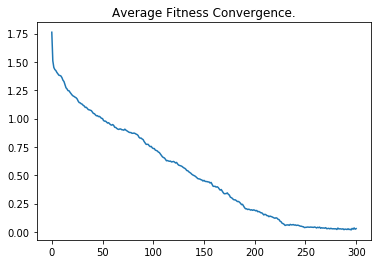

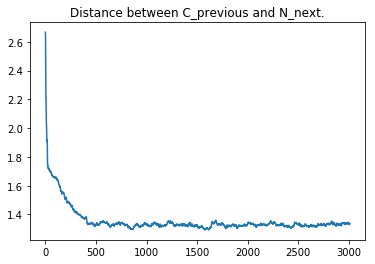

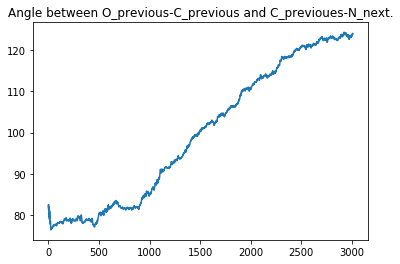

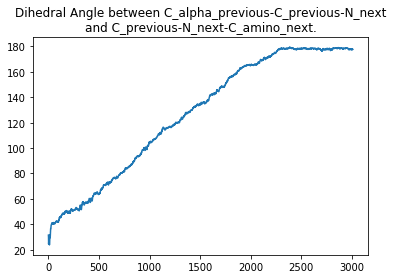

In [17]:
translation, rotation = g.optimize()

### Generate Tertiary Structure

Once we have a way to calculate the translation and rotation of the next aminoacidd in the chain given the previous one, we can implement the routine to generate the tertiary structure of a protein given the primary structure.

In [18]:
primary_structure = 'TT'
# primary_structure = 'TTCCPSIVARSNFNVCRLPGTPEAICATYTGCIIIPGATCPGDYAN'

In [19]:
def _infer_tertiary_structure(primary_structure, aminoacids_df):
    protein = pd.DataFrame(data=None, columns=['atom_name', 'residue_name', 'residue_seq_number', 'x', 'y', 'z'])    
    previous_aminoacid = None
    
    for i, r in enumerate(primary_structure):
        aminoacid = aminoacids_df[aminoacids_df.residue_name == symbol_to_residue_name[r]].copy()
              
        if previous_aminoacid is not None:
            ga = GeneticAlgorithm(dim_populaton=6, n_population=10,
                                  previous_aminoacid=previous_aminoacid, next_aminoacid=aminoacid) 
            translation, rotation = ga.optimize() 
            aminoacid = translate(aminoacid, translation)
            aminoacid = rotate(aminoacid, rotation[0], rotation[1], rotation[2])
        
        aminoacid['residue_seq_number'] = i
        
        previous_aminoacid = aminoacid
        protein = protein.append(aminoacid, sort=True, ignore_index=True)
    return protein

Optimal Solution:


,0
0,1.597200
1,0.259129
2,-0.381660
3,0.265224
4,0.600192
5,0.887187


Optimized Fitness: 0.01


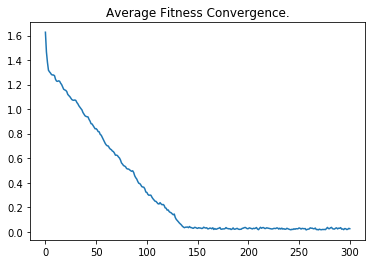

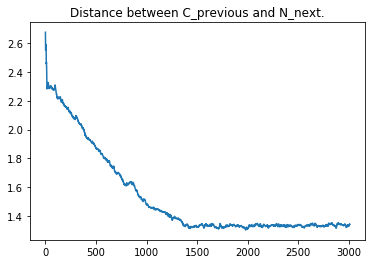

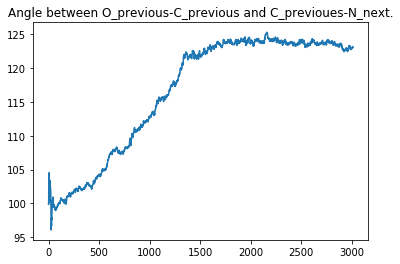

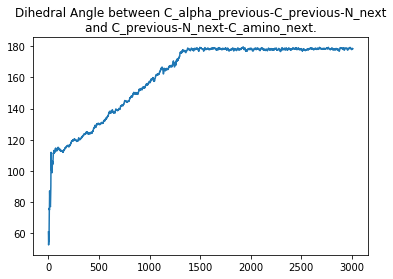

In [20]:
protein = _infer_tertiary_structure(primary_structure, aminoacids)

In [21]:
protein.head(40)

,atom_name,residue_name,residue_seq_number,x,y,z
0,N,THR,0,0.080000,-0.083000,0.000000
1,CA,THR,0,1.539000,-0.033000,0.000000
2,C,THR,0,2.032000,1.394000,0.000000
3,O,THR,0,1.268000,2.339000,0.000000
4,CB,THR,0,2.116000,-0.818000,-1.226000
5,OG1,THR,0,1.743000,-2.188000,-1.162000
6,CG2,THR,0,3.654000,-0.842000,-1.361000
7,1H,THR,0,-0.523000,0.813000,0.000000
8,2H,THR,0,-0.461000,-1.018000,0.000000
9,HA,THR,0,1.904000,-0.508000,0.929000


Done!